In [1]:
import os

def move_to_parent_dir():
    current_directory = os.getcwd()
    parent_directory = os.path.dirname(current_directory)
    os.chdir(parent_directory)
    print("Working directory:", os.getcwd())

move_to_parent_dir() 

Working directory: c:\Users\wwden\OneDrive\Documents\GitHub\dsmp-2024-group-19


In [25]:
# get test data
import matplotlib.pyplot as plt
import numpy as np
from tools import get_Tapes
raw_tapes = get_Tapes(125,0)
tapes_data = [t["Price"].resample("1min").last().ffill().to_numpy() for t in raw_tapes] # resample down to 1 min

# define broker
def broker(actor, price_data: np.array, starting_cash: int):
    time_index = 0
    final_time_index = price_data.shape[0]
    num_stocks = np.zeros_like(price_data)
    cash_value = np.zeros_like(price_data)
    cash_value[0] = starting_cash

    while True:
        action = actor(price_data[:time_index], cash_value[time_index], num_stocks[time_index])

        if action == 1: # buy one stock
            if cash_value[time_index] >= price_data[time_index]:
                cash_value[time_index] = cash_value[time_index] - price_data[time_index]
                num_stocks[time_index] = num_stocks[time_index] + 1

        elif action == 2: # sell one stock
            if num_stocks[time_index] > 0:
                num_stocks[time_index] = num_stocks[time_index] - 1
                cash_value[time_index] = cash_value[time_index] + price_data[time_index]
        else: # do nothing
            pass


        time_index += 1
        if time_index >= final_time_index:
            break

        num_stocks[time_index] = num_stocks[time_index - 1]
        cash_value[time_index] = cash_value[time_index - 1]

    total_value = num_stocks * price_data + cash_value
    profit = 1 - (total_value[-1] / starting_cash)
    

    return num_stocks, cash_value, total_value, profit

# generate folds
def generate_folds(tapes_data, n_folds=5):
    tapes_data = np.array(tapes_data)
    fold_size = len(tapes_data) // n_folds
    
    for i in range(n_folds):
        start_index = i * fold_size
        end_index = (i + 1) * fold_size if i < n_folds - 1 else len(tapes_data)
        
        test_indices = np.arange(start_index,end_index,1, dtype=int)
        # Test split
        test_data = tapes_data[test_indices]
        
        # Training split
        train_data = np.delete(tapes_data, test_indices, axis=0)
        
        yield train_data, test_data

def display_results(results, data):
    plt.figure(figsize=(20,5))
    plt.plot(results[2], 'r', label = "actor")
    plt.twinx()
    plt.plot(data, 'b', label = "data")
    plt.legend()
    plt.show()

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv
Opening UoB_Set01_2025-01-06tapes.csv
Opening UoB_Set01_2025-01-07tapes.csv
Opening UoB_Set01_2025-01-08tapes.csv
Opening UoB_Set01_2025-01-09tapes.csv
Opening UoB_Set01_2025-01-10tapes.csv
Opening UoB_Set01_2025-01-13tapes.csv
Opening UoB_Set01_2025-01-14tapes.csv
Opening UoB_Set01_2025-01-15tapes.csv
Opening UoB_Set01_2025-01-16tapes.csv
Opening UoB_Set01_2025-01-17tapes.csv
Opening UoB_Set01_2025-01-20tapes.csv
Opening UoB_Set01_2025-01-21tapes.csv
Opening UoB_Set01_2025-01-22tapes.csv
Opening UoB_Set01_2025-01-23tapes.csv
Opening UoB_Set01_2025-01-24tapes.csv
Opening UoB_Set01_2025-01-27tapes.csv
Opening UoB_Set01_2025-01-28tapes.csv
Opening UoB_Set01_2025-01-29tapes.csv
Opening UoB_Set01_2025-01-30tapes.csv
Opening UoB_Set01_2025-01-31tapes.csv
Opening UoB_Set01_2025-02-03tapes.csv
Opening UoB_Set01_2025-02-04tapes.csv
Opening UoB_Set01_2025-02-05tapes.csv
Opening UoB_Set01_2025-02-06tapes.csv
Opening UoB_

# Example

In [26]:
def random_actor(current_data, current_cash, current_stocks):
    return np.random.randint(0,3)

def MA_actor(current_data, current_cash, current_stocks):
    if len(current_data) == 0:
        return 0

    window = 20
    ma = np.mean(current_data[-window:])

    if ma > current_data[-1]:
        return 1
    else:
        return 2

results = broker(MA_actor, tapes_data[0], 10_000)

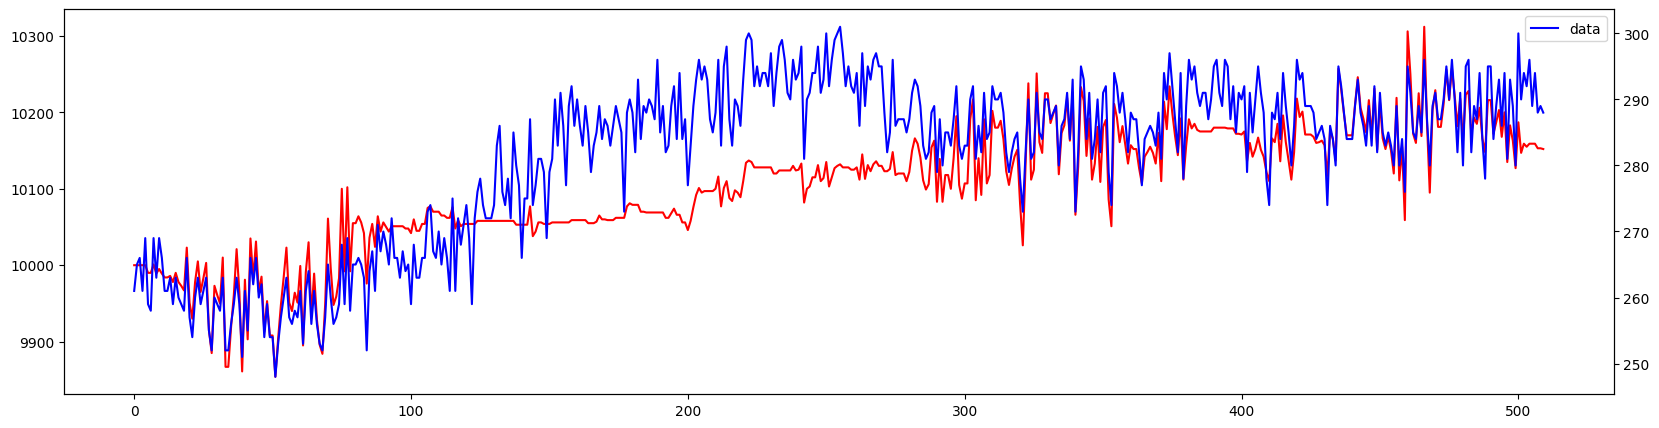

In [27]:
display_results(results, tapes_data[0])

In [18]:
cv_scores = []
for train_data, test_data in generate_folds(tapes_data):
    # train model
    
    for data in test_data:
        results = broker(random_actor, data, 10_000)
        cv_scores.append(results[-1])

print(cv_scores)

[-0.02950000000000008, 0.018399999999999972, -0.03750000000000009, -0.04269999999999996, 0.0413, 0.04520000000000002, 0.08499999999999996, -0.010099999999999998, -0.030000000000000027, 0.007900000000000018, 0.05710000000000004, -0.02299999999999991, -0.023800000000000043, 0.033399999999999985, 0.005900000000000016, -0.009500000000000064, -0.0025999999999999357, -0.08020000000000005, 0.01429999999999998, 0.028900000000000037, 0.008700000000000041, -0.006299999999999972, -0.006599999999999939, 0.038900000000000046, 0.032399999999999984, -0.026499999999999968, 0.0007000000000000339, -0.044399999999999995, -0.05119999999999991, 0.02300000000000002, 0.0030999999999999917, -0.023800000000000043, -0.06709999999999994, 0.0353, 0.12319999999999998, -0.038999999999999924, 0.04039999999999999, -0.04200000000000004, 0.0026000000000000467, 0.006199999999999983, -0.0019000000000000128, 0.0033999999999999586, -0.034599999999999964, 0.006299999999999972, 0.09840000000000004, 0.0012999999999999678, -0.